<a href="https://colab.research.google.com/github/AlexeyBelowzero/Alex_DA_rep/blob/main/BCS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as db

#Reading data

Link to Dataset (Google Drive): https://drive.google.com/file/d/1Vnn7m5UQQfNIHKl-c2ZI0t78f1lXvHhr/view?usp=sharing

Link to Dataset (Kaggle): https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

In [3]:
!gdown --id 1Vnn7m5UQQfNIHKl-c2ZI0t78f1lXvHhr

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Vnn7m5UQQfNIHKl-c2ZI0t78f1lXvHhr
To: /content/BCS.zip
100% 25.4M/25.4M [00:00<00:00, 76.2MB/s]


In [4]:
!unzip /content/BCS.zip

Archive:  /content/BCS.zip
  inflating: bank_transactions.csv   


In [5]:
df = pd.read_csv('/content/bank_transactions.csv')

#Preliminary EDA

In [6]:
pd.set_option('display.max_rows', 100)
df.head(25)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [7]:
df.shape

(1048567, 9)

In [8]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [9]:
#Data gaps
df.isna().mean()

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.003240
CustGender                 0.001049
CustLocation               0.000144
CustAccountBalance         0.002259
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [10]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

#Transforming data

In [11]:
df = df.rename(columns={'TransactionAmount (INR)': 'TransactionAmount_INR'})

In [12]:
df.head(25)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [13]:
# #Transforming datatypes for CustomerDOB and TransactionDate
# df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y', errors='coerce')
# df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y', errors='coerce')

In [14]:
#Transforming data of CustomerDOB
from datetime import datetime

def parse_date(date_str):
    if isinstance(date_str, str):
        date_parts = date_str.split('/')

        if len(date_parts) == 3:
            day, month, year = map(int, date_parts)
            cutoff_year = 20
            if 0 <= year <= cutoff_year:
                year = 2000 + year
            else:
                year = 1900 + year

            return datetime(year, month, day).date()

    return 'Incorrect_data'

df['CustomerDOB'] = df['CustomerDOB'].apply(parse_date)

In [15]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

df['TransactionDate'] = df['TransactionDate'].dt.date

In [16]:
df.head(25)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-02-08,173940,676.00
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.00
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.00
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,192825,833.00
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,192446,289.11


In [17]:
#Transforming datatypes of TransactionTime
def format_time(time_val):
    time_str = str(time_val).zfill(6)

    hours = time_str[:2]
    minutes = time_str[2:4]
    seconds = time_str[4:6]

    return f'{hours}:{minutes}:{seconds}'


df['TransactionTime'] = df['TransactionTime'].apply(format_time)

In [18]:
#Cheking date range of transactions
td_ranges = pd.date_range(start=df['TransactionDate'].min(), end=df['TransactionDate'].max(), periods=10)

print(td_ranges)

DatetimeIndex(['2016-01-08 00:00:00', '2016-02-14 08:00:00',
               '2016-03-22 16:00:00', '2016-04-29 00:00:00',
               '2016-06-05 08:00:00', '2016-07-12 16:00:00',
               '2016-08-19 00:00:00', '2016-09-25 08:00:00',
               '2016-11-01 16:00:00', '2016-12-09 00:00:00'],
              dtype='datetime64[ns]', freq=None)


In [19]:
#Transform all gaps to 'Not_specified'
df = df.fillna('Not_specified')

In [20]:
#Cleansing data of CustomerDOB
from datetime import datetime, timedelta

df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

def validate_customer_dob(row):
    transaction_date = row['TransactionDate']
    min_valid_dob = transaction_date - pd.DateOffset(years=18)

    if row['CustomerDOB'] >= min_valid_dob:
        return 'Incorrect_data'
    elif row['CustomerDOB'] < datetime(1920, 1, 1):
        return 'Incorrect_data'
    else:
        return row['CustomerDOB']


df['CustomerDOB'] = df.apply(validate_customer_dob, axis=1)

In [21]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

df['CustomerDOB'] = df['CustomerDOB'].dt.date

df['CustomerDOB'] = df['CustomerDOB'].fillna('Incorrect_data')

In [22]:
df.head(30)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.50
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2016-02-08,17:39:40,676.00
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.00
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.00
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,19:28:25,833.00
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,19:24:46,289.11


In [23]:
df.isna().mean()

TransactionID            0.0
CustomerID               0.0
CustomerDOB              0.0
CustGender               0.0
CustLocation             0.0
CustAccountBalance       0.0
TransactionDate          0.0
TransactionTime          0.0
TransactionAmount_INR    0.0
dtype: float64

In [24]:
df.shape

(1048567, 9)

#Uploading and reading data

In [25]:
df.to_csv('BCS_treated.csv', index=False)

In [26]:
df = pd.read_csv('/content/BCS_treated.csv')

#EDA of dataset

In [27]:
df.head(25)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.50
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2016-02-08,17:39:40,676.00
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.00
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.00
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,19:28:25,833.00
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,19:24:46,289.11


In [28]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

df['Age'] = (df['TransactionDate'] - df['CustomerDOB']).dt.days // 365

df.loc[df['CustomerDOB'] == 'Incorrect_data', 'Age'] = 'Age_is_not_defined'

In [29]:
def fill_customer_dob(row):
    if row['CustomerDOB'] == 'Not_specified':
        return 'Not_specified'
    else:
        return row['CustomerDOB']


df['CustomerDOB'] = df.apply(fill_customer_dob, axis=1)
df['Age'].fillna('Age_is_not_defined', inplace=True)

In [30]:
df.head(30)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.00,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00,58.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.00,19.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00,42.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.50,27.0
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2016-02-08,17:39:40,676.00,43.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.00,24.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.00,34.0
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,19:28:25,833.00,27.0
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,19:24:46,289.11,31.0


In [31]:
df.dtypes

TransactionID                    object
CustomerID                       object
CustomerDOB              datetime64[ns]
CustGender                       object
CustLocation                     object
CustAccountBalance               object
TransactionDate          datetime64[ns]
TransactionTime                  object
TransactionAmount_INR           float64
Age                              object
dtype: object

In [32]:
# df['CustomerDOB'] = df['CustomerDOB'].replace({pd.NaT: 'Not_specified'})
# df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

In [33]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

df['CustomerDOB'] = df['CustomerDOB'].dt.date

df['CustomerDOB'] = df['CustomerDOB'].fillna('Incorrect_data')

In [34]:
df.head(20)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.00,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00,58.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.00,19.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00,42.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.50,27.0
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2016-02-08,17:39:40,676.00,43.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.00,24.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.00,34.0
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,19:28:25,833.00,27.0
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,19:24:46,289.11,31.0


In [35]:
df.to_csv('BCS_2wa.csv', index=False)

#Visualisation

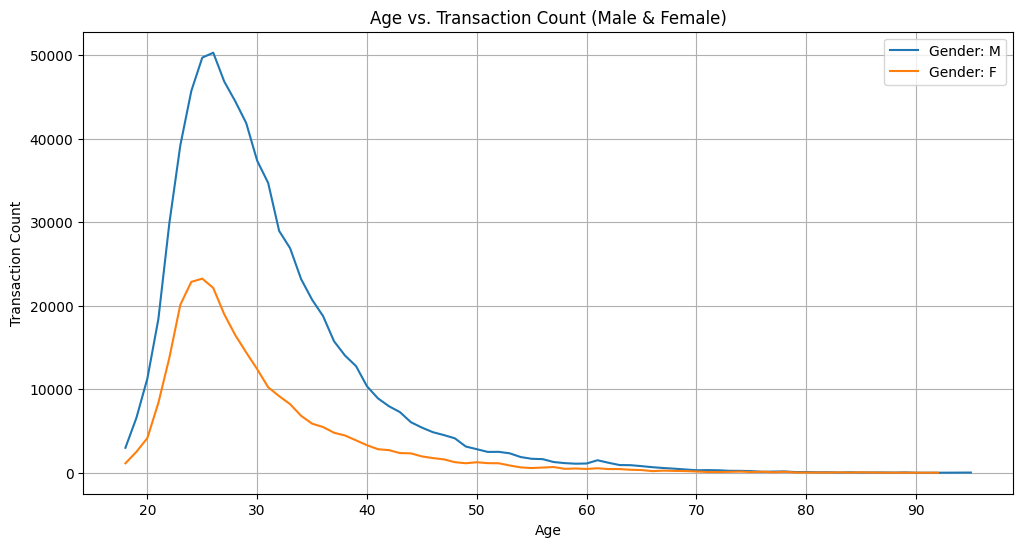

In [36]:
#Age-Transaction distribution
df_filtered = df[df['Age'] != 'Age_is_not_defined']

df_age_gender = df_filtered.groupby(['Age', 'CustGender']).size().reset_index(name='Transactions')

plt.figure(figsize=(12, 6))
plt.title('Age vs. Transaction Count (Male & Female)')
plt.xlabel('Age')
plt.ylabel('Transaction Count')

for gender in ['M', 'F']:
    df_gender = df_age_gender[df_age_gender['CustGender'] == gender]
    plt.plot(df_gender['Age'], df_gender['Transactions'], label=f'Gender: {gender}')

plt.legend()
plt.grid(True)
plt.show()

In [37]:
# df_age_gender = df_filtered.groupby(['Age', 'CustGender']).size().reset_index(name='Transactions')

# print(df_age_gender)

In [38]:
display(df['CustLocation'].unique())
print('---------------------------------------------------------------------------')
display(df['CustLocation'].nunique())

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'KARANJIA',
       'NR HERITAGE FRESH HYDERABAD', 'IMPERIA THANE WEST'], dtype=object)

---------------------------------------------------------------------------


9356

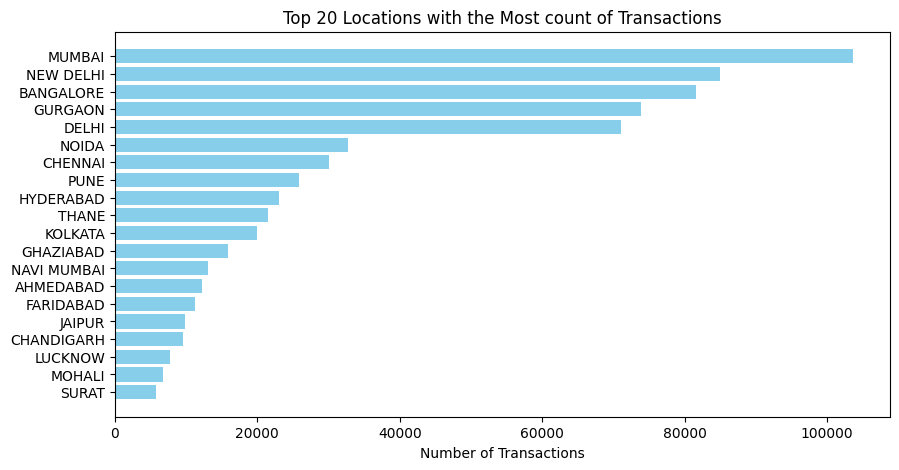

In [39]:
#Top 20 Locations with the Most count of Transactions
top_locations = df['CustLocation'].value_counts().nlargest(20)

plt.figure(figsize=(10, 5))
plt.barh(top_locations.index, top_locations.values, color='skyblue')
plt.xlabel('Number of Transactions')
plt.title('Top 20 Locations with the Most count of Transactions')
plt.gca().invert_yaxis()
plt.show()

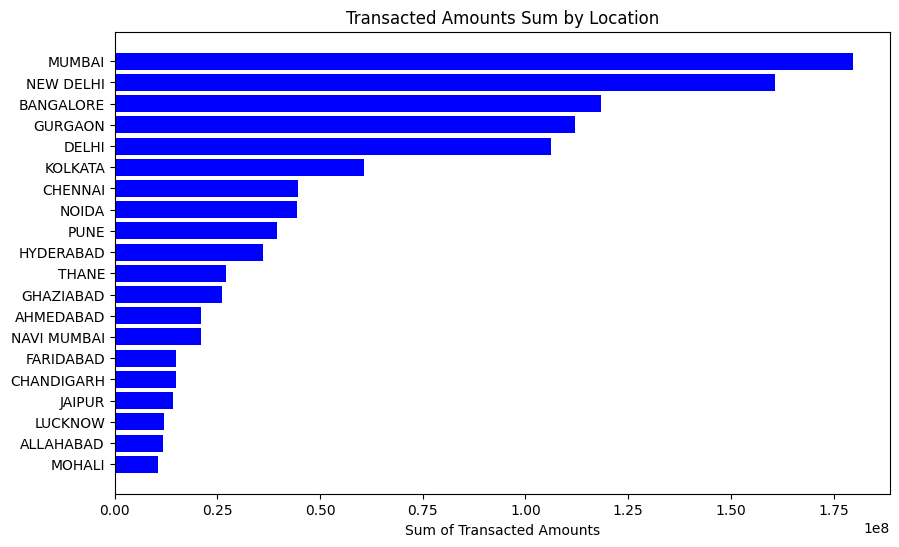

In [40]:
location_amt_df = df.groupby('CustLocation')['TransactionAmount_INR'].sum().reset_index(name='Sum')

# Filter the dataframe to keep only rows corresponding to the top 10 locations by transactions' sum
top_locations_amt = location_amt_df.nlargest(20, 'Sum')

# Plot data
plt.figure(figsize=(10, 6))
plt.barh(top_locations_amt['CustLocation'], top_locations_amt['Sum'], color='blue')

plt.gca().invert_yaxis()
plt.xlabel('Sum of Transacted Amounts')
plt.title('Transacted Amounts Sum by Location')

plt.show()

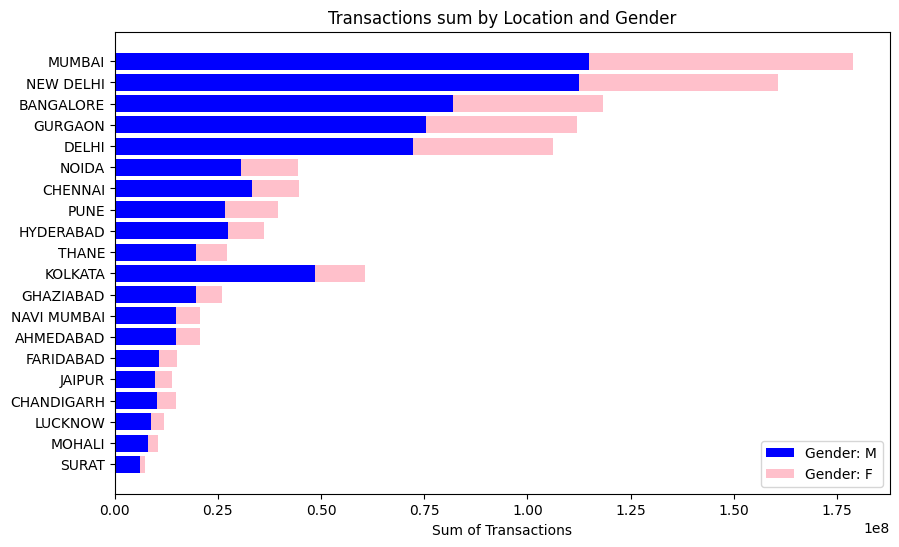

In [41]:
gender_location_df = df.groupby(['CustLocation', 'CustGender'])['TransactionAmount_INR'].sum().reset_index(name='TotalAmount')

# gender_location_df = gender_location_df[gender_location_df['CustLocation'].isin(top_locations.index)]

gender_location_df = gender_location_df.sort_values(by='TotalAmount', ascending=False)


plt.figure(figsize=(10, 6))
bottom = np.zeros(len(top_locations))
colors = {'M': 'blue', 'F': 'pink'}

for gender in ['M', 'F']:
    counts = []
    for location in top_locations.index:
        if location in gender_location_df[gender_location_df['CustGender'] == gender]['CustLocation'].values:
            count = gender_location_df[(gender_location_df['CustGender'] == gender) & (gender_location_df['CustLocation'] == location)]['TotalAmount'].values[0]
        else:
            count = 0
        counts.append(count)
    plt.barh(top_locations.index, counts, color=colors[gender], left=bottom, label=f'Gender: {gender}')
    bottom += counts

plt.gca().invert_yaxis()
plt.xlabel('Sum of Transactions')
plt.title('Transactions sum by Location and Gender')
plt.legend()
plt.show()

In [42]:
df.head(7)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount_INR,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,58.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,19.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,42.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,27.0
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2016-02-08,17:39:40,676.0,43.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.0,24.0
